# Setup

In [101]:
from IPython import InteractiveShell
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# zorg dat alle output getoond wordt
InteractiveShell.ast_node_interactivity = "all"

# Centrummaten

## Voorbereiding

In [102]:
# Zoek en download de file 'laptops.csv' en plaats deze ergens in je pycharm/colab project
# lees de data in
laptops = pd.read_csv('data/laptops.csv', sep=';', decimal=',')

# pas de levels aan van de gegevens op ordinale meetschaal
laptops.cpuGeneration = pd.Categorical(laptops.cpuGeneration, ordered=True,
                                       categories=['Sandy Bridge', 'Ivy Bridge', 'Haswell', 'Broadwell', 'Skylake',
                                                   'Kabylake'])
laptops.cpuType = pd.Categorical(laptops.cpuType, ordered=True, categories=['i3', 'i5', 'i7'])

# nominaal meetniveau
laptops.brand = pd.Categorical(laptops.brand)

print(laptops.head())

  cpuGeneration cpuType   RAM  diskspace    brand
0      Kabylake      i7   4.0      232.5  Toshiba
1      Kabylake      i5   2.0      992.5     Acer
2       Haswell      i7  16.0      495.6     Dell
3       Skylake      i7   4.0      217.2  Toshiba
4     Broadwell      i5   4.0      245.8     Acer


## De modus berekenen

In [103]:
# welke waarde komt het meest voor - gebruik de mode() functie

print(f'Modus = {laptops.cpuGeneration.mode()[0]}')

# check: value_counts toon het aantal per category
print(laptops.cpuGeneration.value_counts().to_frame())

# een ander voorbeeld
print(f'Modus = {laptops.cpuType.mode()[0]}')
print(laptops.cpuType.value_counts())

Modus = Broadwell
              cpuGeneration
Broadwell               218
Haswell                 166
Skylake                 155
Kabylake                143
Ivy Bridge              107
Sandy Bridge             63
Modus = i5
i5    556
i3    213
i7     84
Name: cpuType, dtype: int64


## De mediaan berekenen

In [104]:
# gebruik de median() functie
print(laptops.RAM.median())
print(laptops.diskspace.median())

# median werkt niet op categorical data
# print(laptops.cpuGeneration.median())

# Dit moet volgende  error geven : 
# TypeError: Categorical cannot perform the operation median

# werkt wel met de quantile() functie (zie verder)
print(laptops.cpuGeneration.quantile(0.5))

4.0
249.8
Broadwell


## Zelf median berekenen voor categorical data

In [ ]:
# print(laptops.cpuGeneration.median())
def median_categorical(data):
    import math
    d = data.dropna()
    n = len(d)
    middle = math.floor(n / 2)
    return d.sort_values().reset_index(drop=True)[middle]


# check of het werkt voor
print(median_categorical(laptops.RAM))
print(median_categorical(laptops.cpuGeneration))
print(median_categorical(laptops.cpuType))

## Het gemiddelde berekenen

In [ ]:
# gebruik de mean() functie
print(f'Gemiddelde = {laptops.RAM.mean():.2f}')
print(f'Gemiddelde = {laptops.diskspace.mean():.2f}')

# MEAN werkt niet op categorical data
# print(f'Gemiddelde = {laptops.cpuGeneration.mean():.2f}')
# geen work-around mogelijk deze keer

# Dit moet volgende  error geven :
# TypeError: Categorical cannot perform the operation median

In [ ]:
abs_freq = laptops.RAM.value_counts()
print(pd.Series(np.repeat(abs_freq.index, abs_freq)).mean())

## De mediaan berekenen bij gegeven frequenties

In [ ]:
from IPython.core.display import Markdown

# value_counts(normalize=True) geeft relatieve frequentie per category
rel_freq = laptops.cpuGeneration.value_counts(normalize=True).sort_index()
print(rel_freq.to_frame())

# omzetten naar cumulatieve frequenties per category
cum_freq = rel_freq.cumsum() * 100
print(cum_freq.to_frame())

Markdown('### Enkel cumulatieve freq > 50')
print(cum_freq[cum_freq > 50].to_frame())

Markdown('### Median is eerste die cum freq > 50 heeft')
print(cum_freq[cum_freq > 50].index[0])
print(cum_freq[cum_freq > 50][0])

              cpuGeneration
Sandy Bridge       0.073944
Ivy Bridge         0.125587
Haswell            0.194836
Broadwell          0.255869
Skylake            0.181925
Kabylake           0.167840
              cpuGeneration
Sandy Bridge       7.394366
Ivy Bridge        19.953052
Haswell           39.436620
Broadwell         65.023474
Skylake           83.215962
Kabylake         100.000000


### Enkel cumulatieve freq > 50

           cpuGeneration
Broadwell      65.023474
Skylake        83.215962
Kabylake      100.000000


### Median is eerste die cum freq > 50 heeft

Broadwell
65.02347417840375


## Het gewogen gemiddelde berekenen

In [ ]:
studiepunten = pd.Series([6, 11, 5, 3, 3, 7, 4, 7, 7, 3, 4])
scores = pd.Series([18, 15, 12, 10, 18, 13, 17, 15, 13, 12, 12])
gewogen = sum(studiepunten * scores) / sum(studiepunten)
print(gewogen)

14.266666666666667


In [ ]:
f = studiepunten / sum(studiepunten)

print(sum(f * scores))

14.266666666666667


Kan ook met de numpy functie `average`. Deze functie heeft een parameter `weights` waar je de gewichten kan meegeven.

In [ ]:
print(np.average(scores, weights=studiepunten))

14.266666666666667


## Het meetkundig gemiddelde berekenen


In [ ]:
from scipy.stats import gmean

koers = pd.Series([5, 3, -2])
koers = koers / 100 + 1
Markdown('Berekende meetkundig gemiddelde voor koers')
print((np.exp(np.mean(np.log(koers))) - 1) * 100)

Markdown('Gebruik \' gmean \'  als meetkundig gemiddelde voor koers')
print((gmean(koers) - 1) * 100)
# ter info : GMean staat voor 'Geometric Mean'

# alternatieve berekeningswijze
Markdown('Nog een alternatieve berekeningswijze')
print((np.prod(koers) ** (1 / len(koers)) - 1) * 100)

Berekende meetkundig gemiddelde voor koers

1.9571138432914026


Gebruik ' gmean '  als meetkundig gemiddelde voor koers

1.9571138432914026


Nog een alternatieve berekeningswijze

1.9571138432914026


## Het harmonisch gemiddelde berekenen

In [ ]:
snelheid = pd.Series([120, 100])
Markdown('Berekende harmonisch gemiddelde voor snelheid')
print(1 / np.mean(1 / snelheid))
from scipy import stats

Markdown('Gebruik \'hmean\'  als harmonisch gemiddelde voor snelheid')
print(stats.hmean(snelheid))
# ter info : HMean staat voor 'Harmonic Mean'

Berekende harmonisch gemiddelde voor snelheid

109.0909090909091


Gebruik 'hmean'  als harmonisch gemiddelde voor snelheid

109.0909090909091


# Spreidingsmaten

## Kwantielen berekenen

In [ ]:
# We zijn alleen geïnteresseerd in HD's kleiner dan 100 GB
laptops_small = laptops[laptops.diskspace < 100]

# Gebruik voor kwartielen, decielen en percentielen de functie quantile
Markdown('Bereken kwantiel voor laptops diskspaces')
laptops_small.diskspace.quantile(q=[0.25, 0.5, 0.75])

# Gebruik voor de interkwartielafstand de functie IQR:
Markdown('Bereken interkwartielafstand voor laptops')
stats.iqr(laptops_small.diskspace.dropna())

Bereken kwantiel voor laptops diskspaces

0.25    90.4
0.50    93.8
0.75    96.5
Name: diskspace, dtype: float64

Bereken interkwartielafstand voor laptops

6.099999999999994

In [ ]:
laptops.quantile(q=np.repeat(1 / 4, 4).cumsum(), numeric_only=False)

,cpuGeneration,cpuType,RAM,diskspace,brand
0.25,Haswell,i5,4.0,227.80,Asus
0.50,Broadwell,i5,4.0,249.80,HP
0.75,Skylake,i5,8.0,489.85,Lenovo
1.00,Kabylake,i7,16.0,1023.80,Toshiba


## Boxplot
Aangezien de dataset van de harde schijven bevat rond 4 soorten HD's.
(1T, 500Mb, 250Mb en 100Mb) dat zie je goed in de scatterplot hieronder.

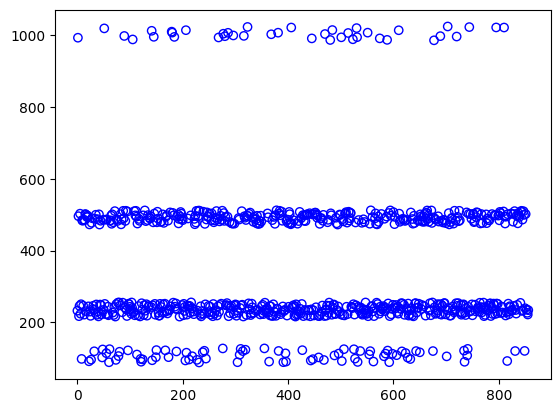

In [ ]:
fig, ax = plt.subplots()
_ = plt.scatter(x=laptops.index, y=laptops.diskspace, facecolors='none', edgecolors='b')

We gaan dus alleen kijken naar HD's die kleiner zijn dan 100 GB zodat we slechts 1 median, 1 mean en 1 modus hebben om ons zorgen over te maken.

Om de demonstratie wat relevanter te maken worden er ook eerst enkele uitschieters toegevoegd.

In [ ]:
laptops_small = laptops[laptops.diskspace < 100]
# We voegen zelf een paar outliers toe
laptops_small.at[8, 'diskspace'] = 110
laptops_small.at[22, 'diskspace'] = 135
laptops_small.at[124, 'diskspace'] = 30
laptops_small.at[447, 'diskspace'] = 75

## Boxplot

,cpuGeneration,cpuType,RAM,diskspace,brand
8,Skylake,i5,8.0,110.0,Medion
22,Kabylake,i5,4.0,135.0,Toshiba
26,Haswell,i5,4.0,96.1,HP
60,Broadwell,i5,16.0,88.9,HP
73,Broadwell,i5,4.0,95.5,Dell
120,Haswell,i7,4.0,98.3,Toshiba
121,Haswell,i7,4.0,90.4,Acer
124,Broadwell,i3,2.0,30.0,Apple
142,Haswell,i5,1.0,94.5,Acer
205,Haswell,i3,4.0,93.9,HP


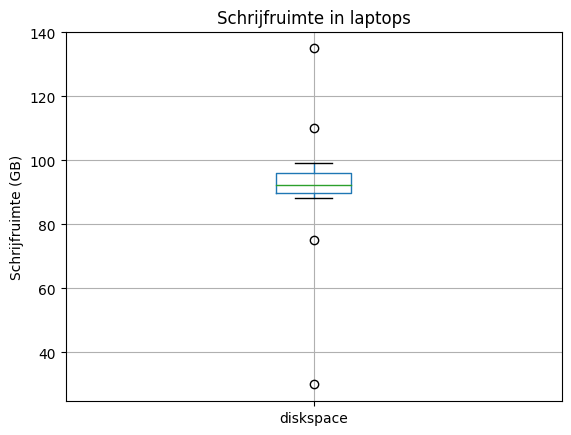

In [ ]:
fig, ax = plt.subplots()
print(laptops_small)
_ = laptops_small.boxplot(ax=ax, column=['diskspace'])
_ = ax.set_title('Schrijfruimte in laptops')
_ = ax.set_ylabel('Schrijfruimte (GB)')

Je kan ook meerdere kolommen plotten.

<font color='red'>*Volgende grafiek is informatief.*</font>

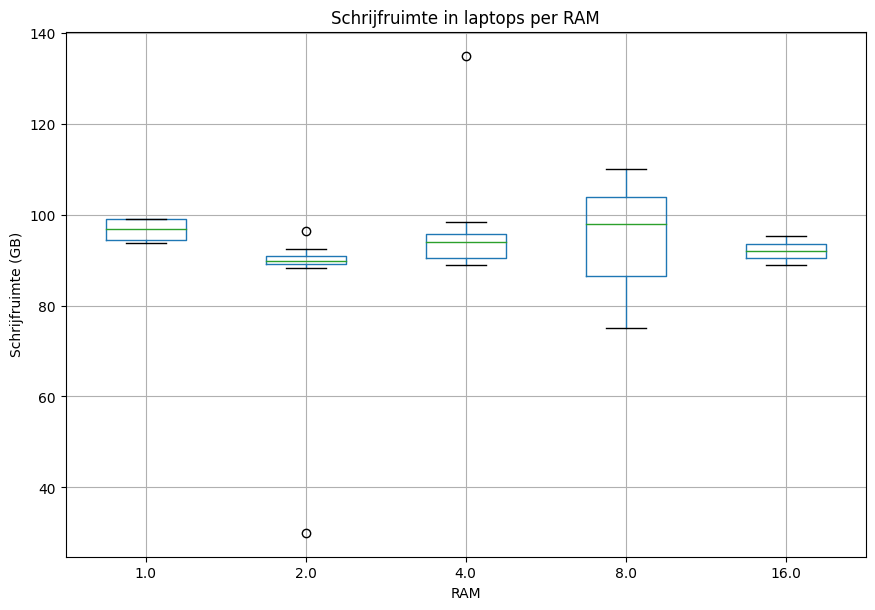

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = laptops_small.boxplot(ax=ax, by='RAM', column=['diskspace'])
_ = ax.set_title('Schrijfruimte in laptops per RAM')
_ = ax.set_ylabel('Schrijfruimte (GB)')
_ = fig.suptitle('')

## IQR gebruiken om outliers te vinden

In [ ]:
Q1 = laptops_small.diskspace.quantile(0.25)
Q3 = laptops_small.diskspace.quantile(0.75)
IQR = Q3 - Q1
print('IQR : ', IQR)

# We gebruiken hier ~  als NOT operator.
# m.a.w.. de outliers zijn alle gegevens die NIET tussen de 2 extreme waarden liggen

outliers = laptops_small.diskspace[~laptops_small.diskspace.between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)]
extreme_outliers = laptops_small.diskspace[~laptops_small.diskspace.between(Q1 - 3 * IQR, Q3 + 3 * IQR)]

print('\noutliers:')
print(outliers)
print('\nextreme outliers:')
print(extreme_outliers)

IQR :  6.299999999999997

outliers:
8      110.0
22     135.0
124     30.0
447     75.0
Name: diskspace, dtype: float64

extreme outliers:
22     135.0
124     30.0
Name: diskspace, dtype: float64


In [ ]:
IQR = (Q3 := laptops.diskspace.quantile(0.75)) - (Q1 := laptops.diskspace.quantile(0.25))
outliers = ~laptops.diskspace.between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
print(laptops[outliers])

,cpuGeneration,cpuType,RAM,diskspace,brand
1,Kabylake,i5,2.0,992.5,Acer
51,Haswell,i5,16.0,1018.5,Toshiba
89,Haswell,i3,16.0,997.4,Toshiba
105,Kabylake,i3,8.0,987.7,Dell
141,Sandy Bridge,i5,8.0,1011.8,HP
145,Skylake,i5,4.0,995.0,Dell
178,Broadwell,i7,1.0,NaN,HP
179,Broadwell,i5,2.0,1009.4,Acer
180,Skylake,i5,4.0,1006.7,Asus
184,Kabylake,i5,16.0,994.8,HP


## Extra : Plot Afwijkingen
<font color='red'>*Volgende grafiek is louter informatief.*</font>

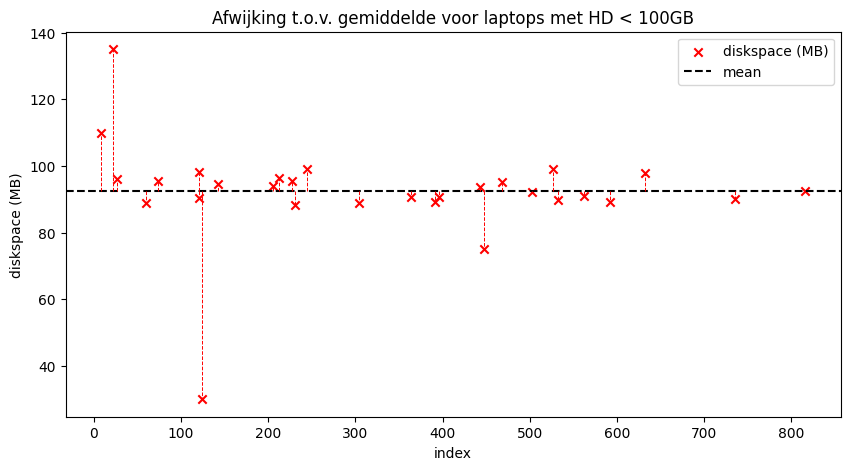

In [ ]:
# Maak van het gemiddelde een Series met de functie repeat
means = laptops_small.diskspace.mean().repeat(laptops_small.diskspace.size)

# we gaan verticale streepjes maken op de grafiek
# de x-waarden zijn 2 keer hetzelfde, de y waarden zijn gemiddelde en diskspace
x = (laptops_small.index, laptops_small.index)
y = (means, laptops_small.diskspace)
# list(zip(*x, *y))

fig, ax = plt.subplots(figsize=(10, 5))
# de meetpunten (diskspace) plotten we met scatterplot
_ = ax.scatter(x=laptops_small.index, y=laptops_small.diskspace, label='diskspace (MB)', color='red', marker='x')

# Het gemiddelde plotten we met een horizontale lijn
_ = ax.axhline(laptops_small.diskspace.mean(), color='black', linestyle='--', label='mean')

# De afwijkingen t.o.v. het gemiddelde plotten we met een verticale lijn
_ = ax.plot(x, y, color='red', linestyle='--', linewidth=0.7)
_ = ax.set_xlabel('index')
_ = ax.set_ylabel('diskspace (MB)')
_ = ax.set_title('Afwijking t.o.v. gemiddelde voor laptops met HD < 100GB')
_ = ax.legend()

## Absoluut Gemiddelde Afwijking

In [ ]:
mean = laptops_small.diskspace.mean()
mad = laptops_small.diskspace.mad()
print('MAD : ', mad)

print('\noutliers:')
print(laptops_small.diskspace[~laptops_small.diskspace.between(mean - mad, mean + mad)])

MAD :  7.451129607609989

outliers:


C:\Users\elias\AppData\Local\Temp\ipykernel_30708\1215330369.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad = laptops_small.diskspace.mad()


8      110.0
22     135.0
124     30.0
447     75.0
Name: diskspace, dtype: float64

## Variantie en Standaardafwijking

In [ ]:
# We berekenen de variantie met Dataframe.var
print('variantie  : ')
print(laptops_small.var())
# We berekenen de standaard afwijking met Dataframe.std
print('\nstandaard afwijking  : ')
print(laptops_small.std())
# We checken even of de berekening correct is  ie. std = sqrt(var)
print('\n[check]berekende standaard afwijking : ')
print(laptops_small.var().apply(np.sqrt))


variantie  : 


C:\Users\elias\AppData\Local\Temp\ipykernel_30708\2887521532.py:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  laptops_small.var()


RAM           14.527094
diskspace    236.685764
dtype: float64


standaard afwijking  : 


C:\Users\elias\AppData\Local\Temp\ipykernel_30708\2887521532.py:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  laptops_small.std()


RAM           3.811442
diskspace    15.384595
dtype: float64


[check]berekende standaard afwijking : 


C:\Users\elias\AppData\Local\Temp\ipykernel_30708\2887521532.py:9: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  laptops_small.var().apply(np.sqrt)


RAM           3.811442
diskspace    15.384595
dtype: float64

## Extra : variantie steekproef vs. variantie populatie

<font color='red'>*Volgende sectie is louter informatief.*</font>


In [114]:
#We definieren een kleine dataset met marks
info = {
    'Name': ['Parker', 'Smith', 'John', 'William'],
    'sub1_Marks': [52, 38, 42, 37],
    'sub2_Marks': [41, 35, 29, 36]}
data = pd.DataFrame(info)

#We berekenen zelf de som van kwadraat van verschillen tov. gemiddelde
print(data.sub1_Marks.mean())
diffs = data.sub1_Marks - data.sub1_Marks.mean()
sq_diffs = diffs.pow(2)
sq_sum = sq_diffs.sum()

#We berekenen zelf de variantie door te delen door het aantal marks (ie. 4)
print('bereken zelf de variantie en std. afwijking ')
var = sq_sum / 4
print(var)
print(np.sqrt(var))

print('\ngebruik nu de python functies var en std')
print(data.sub1_Marks.var())
print(data.sub1_Marks.std())
print(' .. die zijn niet gelijk!')

print('\nWaarom?')
print('We mogen niet door N delen maar N-1.')
#check de specs : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html
var = sq_sum / 3
print(var)
print(np.sqrt(var))
print(' .. dan hebben we de correcte afwijking!')

42.25

bereken zelf de variantie en std. afwijking 
35.1875
5.931905258852336

gebruik nu de python functies var en std
46.916666666666664
6.849574196011505
 .. die zijn niet gelijk!

Waarom?
We mogen niet door N delen maar N-1.
46.916666666666664
6.849574196011505
 .. dan hebben we de correcte afwijking!


## Extra : Z-scores gebruiken


<font color='red'>*Volgende sectie is louter informatief.*</font>

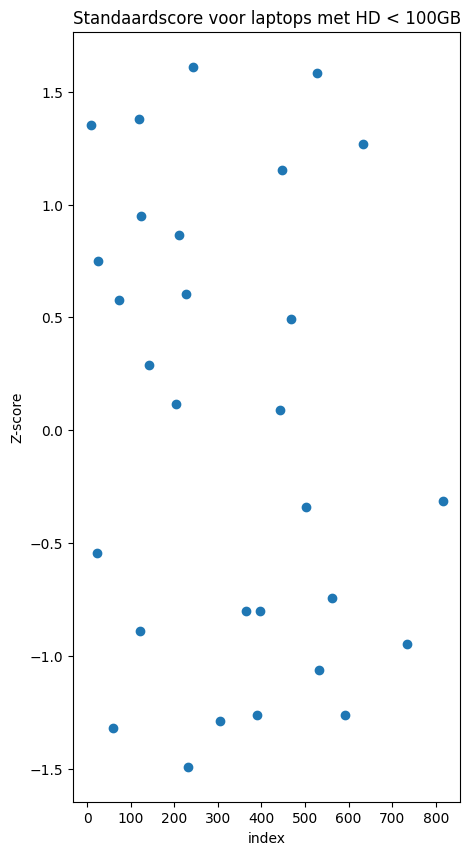

In [116]:
from scipy import stats

zscores = stats.zscore(laptops_small.diskspace)

fig, ax = plt.subplots(figsize=(5, 10))
_ = ax.scatter(laptops_small.diskspace.index, zscores)
_ = ax.set_xlabel('index')
_ = ax.set_ylabel('Z-score')
_ = ax.set_title('Standaardscore voor laptops met HD < 100GB')
plt.show()
